# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [7]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [9]:
import keras
import tensorflow as tf

Check our versions for good measure -- these programs may have very different behavior version-to-version

In [10]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.12.0


#### Loading in housing data as with SKLearn

In [11]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
#selected features, get the target value, pick the training and test set, 20,000 training points

In [5]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [12]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [13]:
#Initializing functional object
model= keras.Sequential()

In [18]:
#figure out length of input
input_len= len(column_selection)
#start building the model
#2nd argu is the input length, activation function 
#added the layer
model.add(keras.layers.Dense(50,input_dim=input_len, activation ='relu'))
#want several layers
#chosen 50 nodes
#no input in graph that attaches to this layer so didnt have to worry about it
model.add(keras.layers.Dense(50,activation='relu'))
#just shows 1 node, the price. doesn't have an activation function . Default is linear so its the same 
#Housing value could be arbitary and very high. 
model.add(keras.layers.Dense(1))
#initialized 3 dense layers

model.compile(loss='mean_squared_error', optimizer='adam')

#optimizer, shows as opposed to gradient descent
#so that keras knows how i will evaluate this in the future

In [20]:
history=model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)
#1 look through data set is epochs
# batch size means matrix multiplication 

#loss should hopefully be decreasing
#In the end you should be able to see the final loss

Epoch 1/50
20000/20000 [==============================] - 0s 10us/step - loss: 51565274575.6672
Epoch 2/50
20000/20000 [==============================] - 0s 10us/step - loss: 50959315376.5376
Epoch 3/50
20000/20000 [==============================] - 0s 10us/step - loss: 51103540425.5232
Epoch 4/50
20000/20000 [==============================] - 0s 11us/step - loss: 51275759104.8192
Epoch 5/50
20000/20000 [==============================] - 0s 10us/step - loss: 51397130027.0080
Epoch 6/50
20000/20000 [==============================] - 0s 10us/step - loss: 51000576645.5296
Epoch 7/50
20000/20000 [==============================] - 0s 11us/step - loss: 50582780660.9408
Epoch 8/50
20000/20000 [==============================] - 0s 10us/step - loss: 50639445524.4800
Epoch 9/50
20000/20000 [==============================] - 0s 10us/step - loss: 50995349055.0784
Epoch 10/50
20000/20000 [==============================] - 0s 10us/step - loss: 50410085279.3344
Epoch 11/50
20000/20000 [==============

In [22]:
preds=model.predict(selected_feature_test)
score(preds, price_test)

0.4907260779132706

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

In [23]:
#sci kit is good to select a model 

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [28]:
# Split out a validation set for hyperparameter optimization

selected_feature_train= selected_feature[:18000]
price_train=price[:18000]

selected_feature_val=selected_feature[18000:20000]
price_val=price[18000:20000]

selected_feature_test=selected_feature[:20000]
price_test=price[20000:]



#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [29]:
# we need a training set to make sure we're on the right prediction

#for easy looping, define neural network model as a function
def nn_model(optimizer='adam',
            activation='relu',
            nodes=50,
            loss='mean_squared_error'):
    model=keras.Sequential()
    model.add(keras.layers.Dense(nodes, activation=activation))
    model.add(keras.layers.Dense(nodes, activation=activation))
    model.add(keras.layers.Dense(1))
    
    model.compile(loss=loss, optimizer=optimizer)
    return model

In [35]:
# we should have a valid set and a test set 

best_score=1000.0 #bad

#loop over activation function, test on valid, take model with best results
for activ in ['sigmoid', 'tanh', 'relu']:
    model=nn_model(activation=activ)
    history=model.fit(selected_feature_train, price_train,
                     epochs=50, batch_size=128,
                     validation_data=(selected_feature_val, price_val))
    model_score=score(model.predict(selected_feature_val), price_val)
    
    if model score < best_score:
        best_score= model_score
        best_activ= activ
        best_model= model
        best_train= history
    
print(f"best function: {best_active} with score {best_score}")
best_model.save("awesome_model.h5")

SyntaxError: invalid syntax (<ipython-input-35-296516e24611>, line 13)

### Visualize your training:

In [36]:
import matplotlib.pyplot as plt
def plot_loss(hist):
    %matplotlib inline
    plt.title("training curve")
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='val')
    plt.xlabel("Epochs")
    plt.ylabel("mean squared error")
    plt.legend()
    plt.show()
    
plot_loss(best_train)

NameError: name 'best_train' is not defined



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [38]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

selected_feature_train= in_scaler.fit_transform(selected_feature_train)
#have to scale validation and test results
selected_feature_val=in_scaler.transform(selected_feature_train)

Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 1s 29us/step - loss: 363890690111.7155 - val_loss: 339911522648.0640
Epoch 2/100
18000/18000 [==============================] - 0s 9us/step - loss: 262444360837.8026 - val_loss: 221764034756.6080
Epoch 3/100
18000/18000 [==============================] - 0s 10us/step - loss: 131726275175.3102 - val_loss: 93918305845.2480
Epoch 4/100
18000/18000 [==============================] - 0s 9us/step - loss: 78452373076.1956 - val_loss: 83418463207.4240
Epoch 5/100
18000/18000 [==============================] - 0s 10us/step - loss: 74266592542.7200 - val_loss: 80894706712.5760
Epoch 6/100
18000/18000 [==============================] - 0s 10us/step - loss: 71990661609.6996 - val_loss: 79107142975.4880
Epoch 7/100
18000/18000 [==============================] - 0s 10us/step - loss: 70267903286.3858 - val_loss: 77647935045.6320
Epoch 8/100
18000/18000 [==============================] - 0s 10us

18000/18000 [==============================] - 0s 10us/step - loss: 61076965483.4062 - val_loss: 71212602621.9520
Epoch 66/100
18000/18000 [==============================] - 0s 9us/step - loss: 60949776848.2133 - val_loss: 71327016157.1840
Epoch 67/100
18000/18000 [==============================] - 0s 8us/step - loss: 60531289984.5689 - val_loss: 70916039966.7200
Epoch 68/100
18000/18000 [==============================] - 0s 9us/step - loss: 60512405953.6498 - val_loss: 70893921959.9360
Epoch 69/100
18000/18000 [==============================] - 0s 8us/step - loss: 60367753896.8462 - val_loss: 70688492683.2640
Epoch 70/100
18000/18000 [==============================] - 0s 8us/step - loss: 60095418874.0835 - val_loss: 70497580285.9520
Epoch 71/100
18000/18000 [==============================] - 0s 8us/step - loss: 60195469146.3396 - val_loss: 70579456770.0480
Epoch 72/100
18000/18000 [==============================] - 0s 8us/step - loss: 59921240781.2551 - val_loss: 70629244469.2480
Epoc

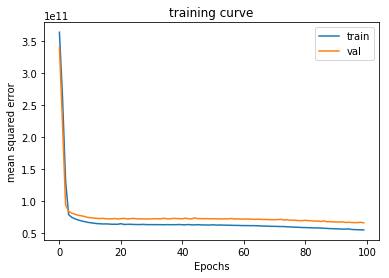

In [37]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=100, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_val), price_val)
print(model_score)

plot_loss(history)

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

In [43]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks=[EarlyStopping(monitor='val_loss', patience=5),
          Model(Checkpoint(filepath='best_model.h5',
                          monitor='val_loss',
                          save_best_only =True,
                          verbose=1))]
model= nn_model(nodes=50)
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(selected_feature_train, price_train,
                 epochs=300, callbacks=callbacks, batch_size=128,
                 validation_data=(selected_feature_val,price_val))
model_score=score(model.predict(selected_feature_val), price_val)
print(f"Model score:{model_score}")
plot_loss(history)


NameError: name 'Model' is not defined

### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test